In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from datetime import datetime

from data_prepro import get_energy_data_today

In [2]:
df_energy = get_energy_data_today()

c:\Users\ytl_c\OneDrive\Desktop\23_24 WS (Master)\VL - PTSFC\2023_11-PTSFC
27 NA in df


In [9]:
df_energy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 78566 entries, 2014-12-31 23:00:00+00:00 to 2023-12-18 12:00:00+00:00
Freq: H
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   gesamt         78566 non-null  float64            
 1   timestamp_CET  78566 non-null  datetime64[ns, CET]
 2   weekday        78566 non-null  int32              
dtypes: datetime64[ns, CET](1), float64(1), int32(1)
memory usage: 2.1 MB


In [10]:
import pandas as pd
import matplotlib.pyplot as plt 

from statsmodels.tsa.seasonal import MSTL
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [49]:
# take last n values only
n_last = 1000
df_energy_small = df_energy.iloc[-n_last:][['gesamt']]

# take values from 2020-01-01 to 2023-01-01
# df_energy_small = df_energy.loc['2020-01-01':'2023-01-01'][['gesamt']]
df_energy_small.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000 entries, 2023-11-06 21:00:00+00:00 to 2023-12-18 12:00:00+00:00
Freq: H
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   gesamt  1000 non-null   float64
dtypes: float64(1)
memory usage: 15.6 KB


In [56]:
mstl = MSTL(df_energy_small, periods=[24, 24*7], iterate=3, stl_kwargs={"seasonal_deg": 0,
                                                                        "inner_iter": 2,
                                                                        "outer_iter": 0})

res = mstl.fit()

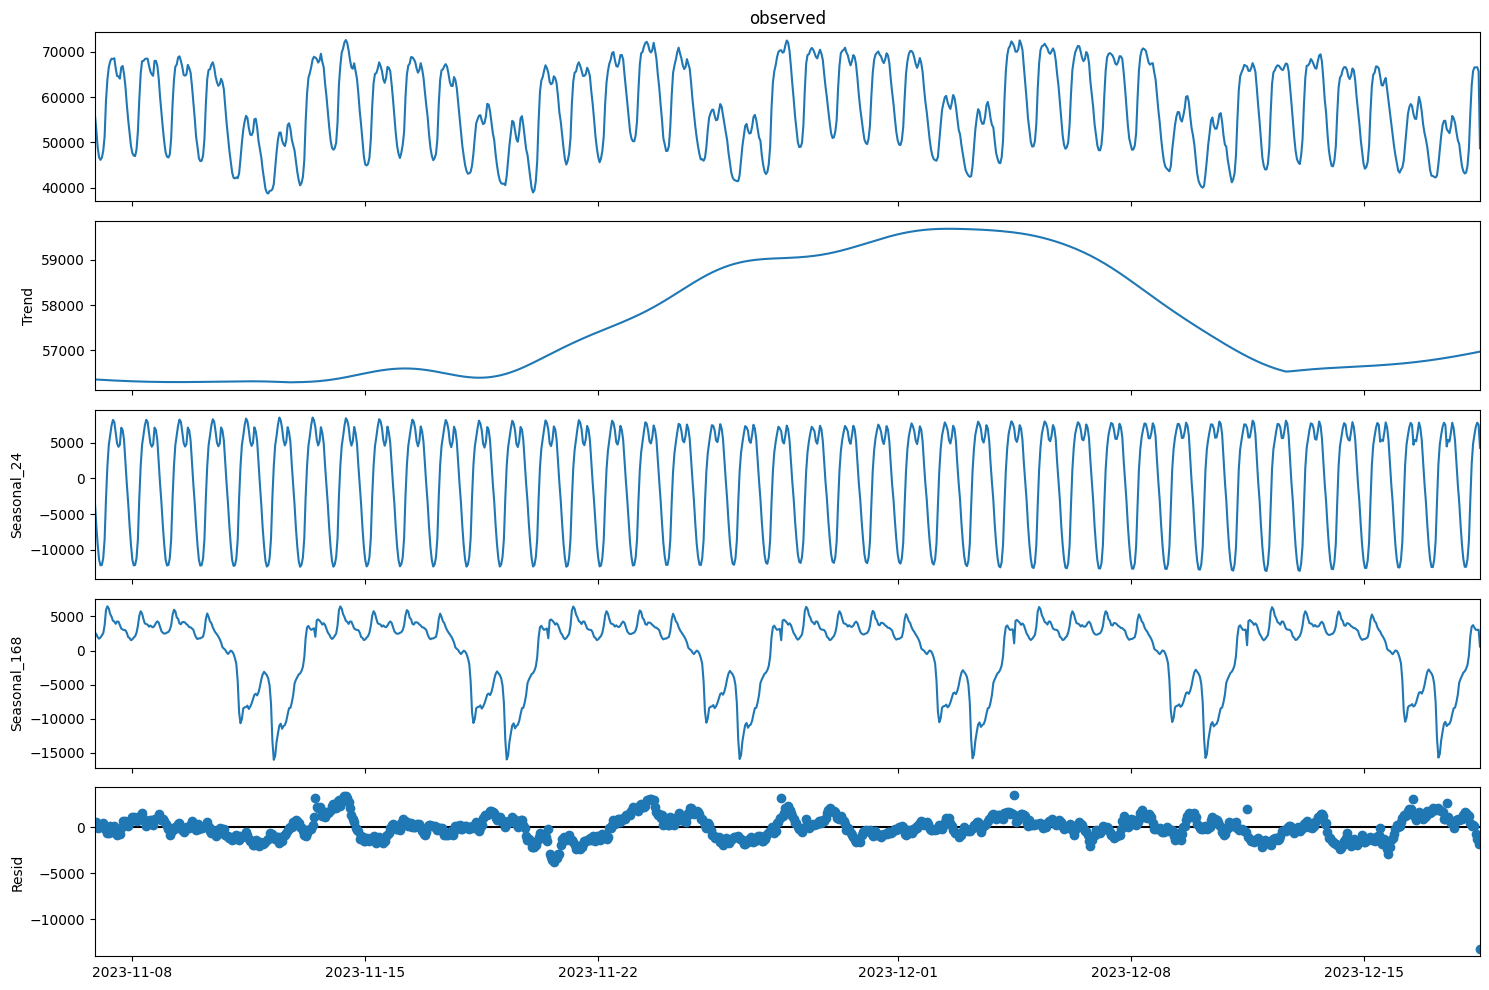

In [57]:
plt.rc("figure", figsize=(15, 10))
plt.rc("font", size=10)

res.plot()
plt.tight_layout()
plt.show()
